# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving google-play-store.csv to google-play-store (1).csv


In [0]:
import io
gpt_data = pd.read_csv(io.BytesIO(uploaded['google-play-store.csv']))

In [7]:
gpt_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
gpt_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
# có app trùng nhau ví dụ : Google My Business 
gpt_data[gpt_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


In [0]:
# xóa các App bị duplication
gpt_data= gpt_data.drop_duplicates(subset='App')

In [0]:
gpt_data.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])

In [0]:
# nếu rating bị NaN thì thay bằng 0
gpt_data.fillna(0,inplace=True)


In [13]:
gpt_data[gpt_data['Rating'] == 0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,0.0,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,0.0,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,0.0,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,0.0,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,0.0,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [14]:
gpt_data['Rating'].describe().T

count    9648.000000
mean        3.542651
std         1.574478
min         0.000000
25%         3.600000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

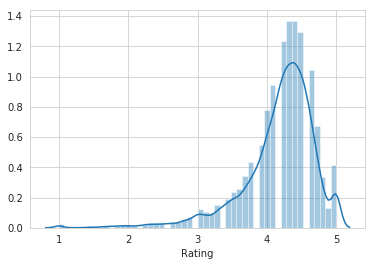

In [19]:
#biểu đồ lệch trái cho thấy người dùng đánh giá các ứng dụng trên play store khá chất lượng tập trung chủ yếu ở 4 đến 5 sao
sns.distplot(gpt_data[gpt_data['Rating']!=0]['Rating'])

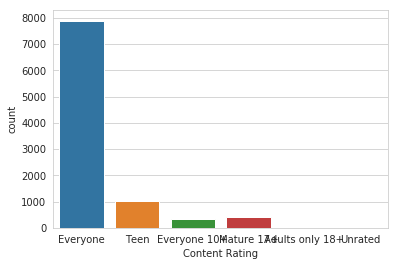

In [20]:
sns.countplot(data=gpt_data,x='Content Rating')

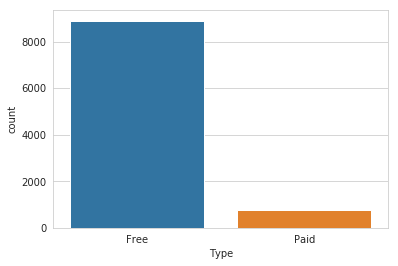

In [21]:
# hầu hết ứng dụng là miễn phí trên playstore
sns.countplot(data=gpt_data,x='Type')

In [36]:
# top 5 thể loại là tools ....
temp = gpt_data['Genres'].value_counts()
temp = temp.reset_index()
temp = temp[temp['Genres'] > 100]
temp.head()

,index,Genres
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395


In [41]:
# 10 ứng dụng trong 100 ngàn ứng dụng cài đặt với đánh giá >= 4.5 trong năm 2018 thuộc thể loại Tools
d = pd.DatetimeIndex(gpt_data['Last Updated'])
gpt_data['Year'] = d.year
gpt_data[(gpt_data['Installs'] != '1,000,000,000+') & (gpt_data['Genres'] == 'Tools') & (gpt_data['Rating'] >= 4.5) & (gpt_data['Year'] == 2018)]['App'][0:10]

3239    Cache Cleaner-DU Speed Booster (booster & clea...
3240                                   Moto Suggestions ™
3246                                         File Manager
3248    Calculator - free calculator, multi calculator...
3249                                  ASUS Sound Recorder
3253                                           ZenUI Help
3255                           SHAREit - Transfer & Share
3256                        ZenUI Keyboard – Emoji, Theme
3257      Files Go by Google: Free up space on your phone
3285                         I Can't Wake Up! Alarm Clock
Name: App, dtype: object